<a href="https://colab.research.google.com/github/Teja220/EDA/blob/main/21BDS0277.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Teja220/EDA.git


Cloning into 'EDA'...


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Dataset from GitHub
github_url = "https://raw.githubusercontent.com/Teja220/EDA/main/EDA.xlsx"
eda_df = pd.read_excel(github_url, sheet_name='EDA')

In [ ]:
print(eda_df.head())

  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota 1957-03-04   
1               Building Products     Milwaukee, Wisconsin 2017-07-26   
2           Health Care Equipment  North Chicago, Illinois 1957-03-04   
3                   Biotechnology  North Chicago, Illinois 2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland 2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  


In [ ]:
# Dataset Shape
print("Dataset Shape:", eda_df.shape)

Dataset Shape: (503, 8)


In [ ]:
print("\nFirst 5 rows:")
display(eda_df.head())


First 5 rows:


,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [ ]:
print("\nSummary Statistics:")
display(eda_df.describe(include='all'))


Summary Statistics:


,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
count,503,503,503,503,503,503,5.030000e+02,503
unique,503,503,11,127,252,NaN,NaN,199
top,MMM,3M,Industrials,Health Care Equipment,"New York City, New York",NaN,NaN,1993
freq,1,1,78,18,41,NaN,NaN,13
mean,NaN,NaN,NaN,NaN,NaN,2001-06-01 20:13:50.218687872,8.217536e+05,NaN
min,NaN,NaN,NaN,NaN,NaN,1957-03-04 00:00:00,1.800000e+03,NaN
25%,NaN,NaN,NaN,NaN,NaN,1992-08-16 00:00:00,1.005050e+05,NaN
50%,NaN,NaN,NaN,NaN,NaN,2008-03-31 00:00:00,9.000750e+05,NaN
75%,NaN,NaN,NaN,NaN,NaN,2017-03-16 12:00:00,1.175188e+06,NaN
max,NaN,NaN,NaN,NaN,NaN,2024-07-08 00:00:00,2.005951e+06,NaN


In [ ]:
print("\nMissing Values:")
display(eda_df.isnull().sum())


Missing Values:


,0
Symbol,0
Security,0
GICS Sector,0
GICS Sub-Industry,0
Headquarters Location,0
Date added,0
CIK,0
Founded,0


In [ ]:
print("\nDuplicate Rows:", eda_df.duplicated().sum())


Duplicate Rows: 0


In [ ]:
print("\nData Types:")
display(eda_df.dtypes)


Data Types:


,0
Symbol,object
Security,object
GICS Sector,object
GICS Sub-Industry,object
Headquarters Location,object
Date added,datetime64[ns]
CIK,int64
Founded,object


In [ ]:
eda_df.fillna(method='ffill', inplace=True)  # Forward fill

<ipython-input-11-bc19166dfd10>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  eda_df.fillna(method='ffill', inplace=True)  # Forward fill


In [ ]:
eda_df.drop_duplicates(inplace=True)

In [ ]:
# Convert date column
eda_df['Date added'] = pd.to_datetime(eda_df['Date added'])

In [ ]:
# Convert 'Founded' column to numeric by extracting the first four digits
eda_df['Founded'] = eda_df['Founded'].astype(str).str.extract(r'(\d{4})').astype(float)

# Drop NaN values after extraction (if any)
eda_df.dropna(subset=['Founded'], inplace=True)

In [ ]:
print("\nData Cleaning Done ✅")


Data Cleaning Done ✅


#Univariate Analysis

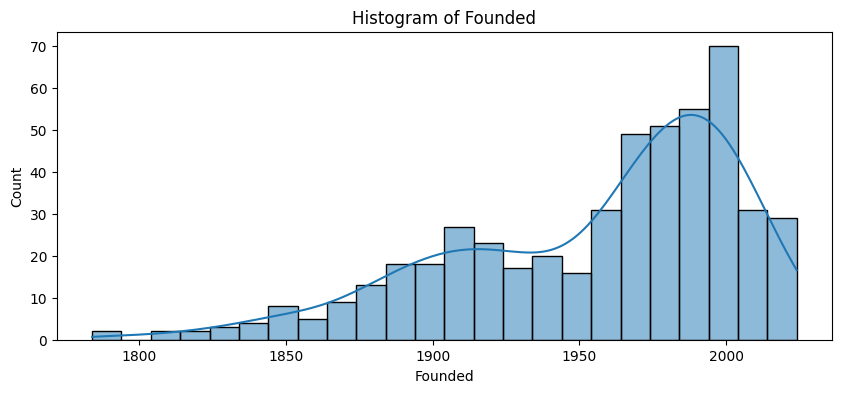

In [ ]:
plt.figure(figsize=(10, 4))
sns.histplot(eda_df['Founded'], bins=range(int(eda_df['Founded'].min()), int(eda_df['Founded'].max()) + 10, 10), kde=True)
plt.title('Histogram of Founded')
plt.show()


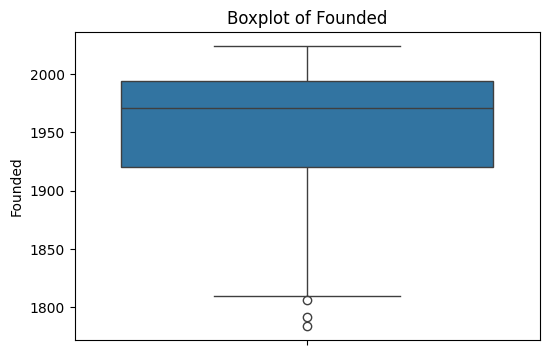

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=eda_df['Founded'])
plt.title('Boxplot of Founded')
plt.show()


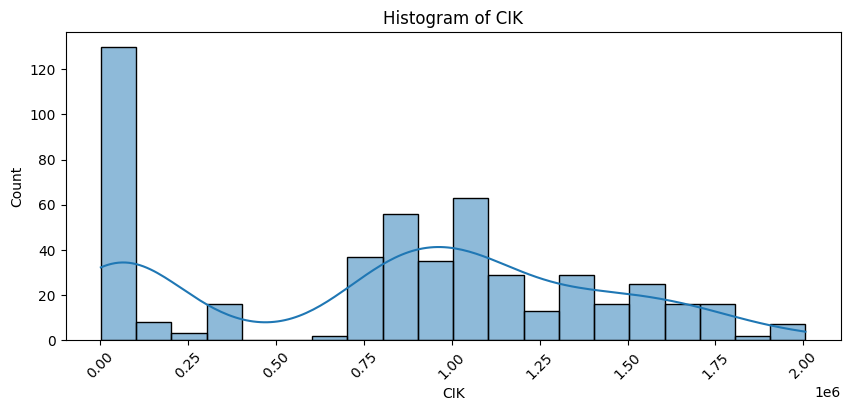

In [ ]:
plt.figure(figsize=(10, 4))
sns.histplot(eda_df['CIK'], bins=20, kde=True)
plt.xticks(rotation=45)
plt.title('Histogram of CIK')
plt.show()

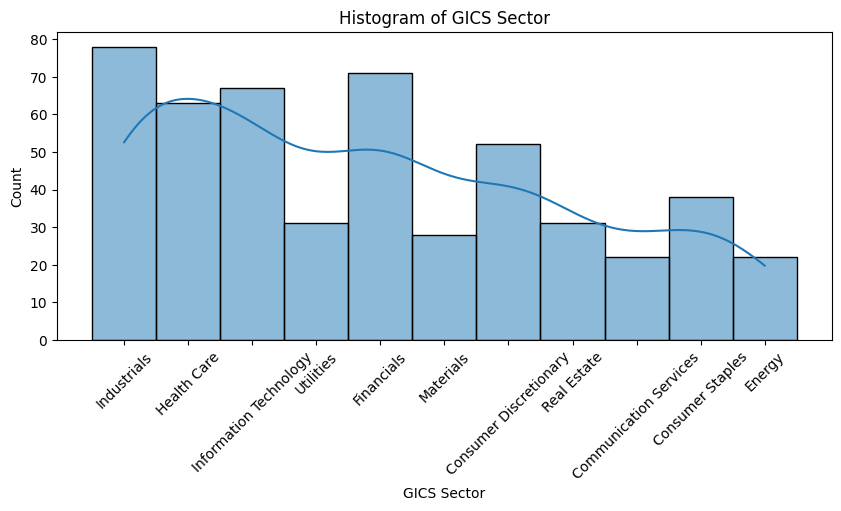

In [ ]:
plt.figure(figsize=(10, 4))
sns.histplot(eda_df['GICS Sector'], bins=20, kde=True)
plt.xticks(rotation=45)
plt.title('Histogram of GICS Sector')
plt.show()

#Bivariate Analysis

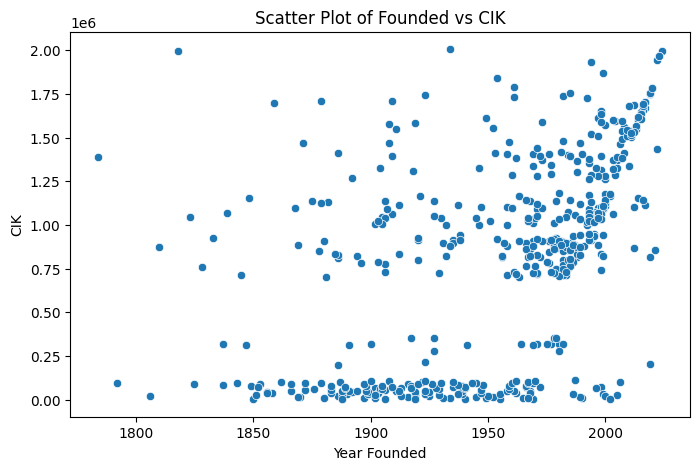

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=eda_df['Founded'], y=eda_df['CIK'])
plt.title('Scatter Plot of Founded vs CIK')
plt.xlabel('Year Founded')
plt.ylabel('CIK')
plt.show()


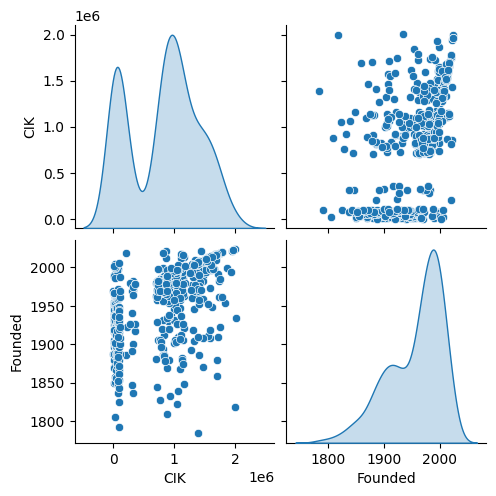

In [ ]:
sns.pairplot(eda_df, diag_kind='kde')
plt.show()


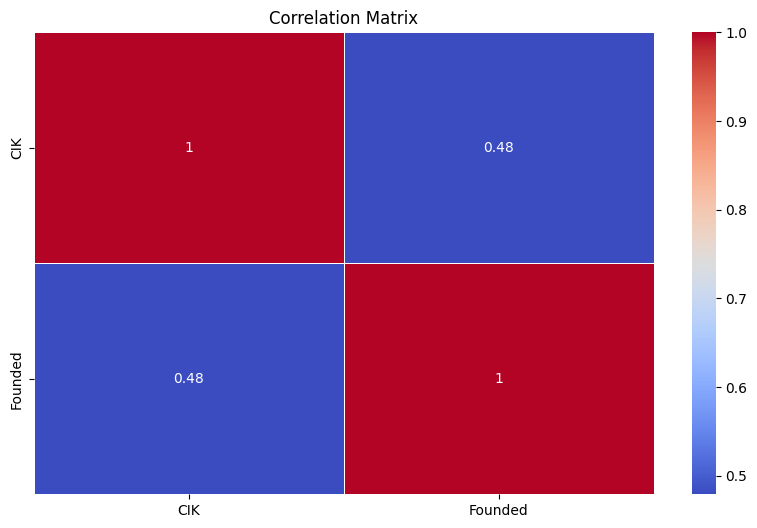

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(eda_df[['CIK', 'Founded']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

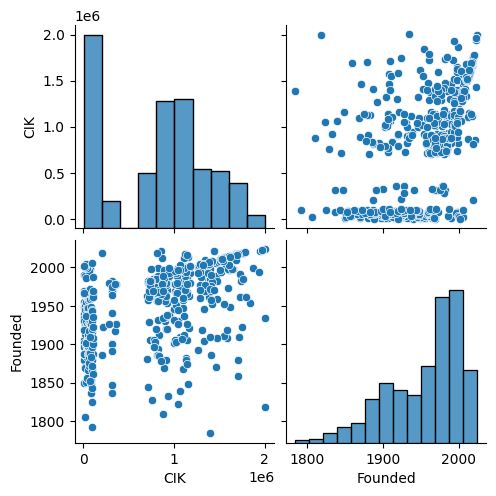

In [ ]:
sns.pairplot(eda_df[['CIK', 'Founded']])
plt.show()


#Categorical Analysis

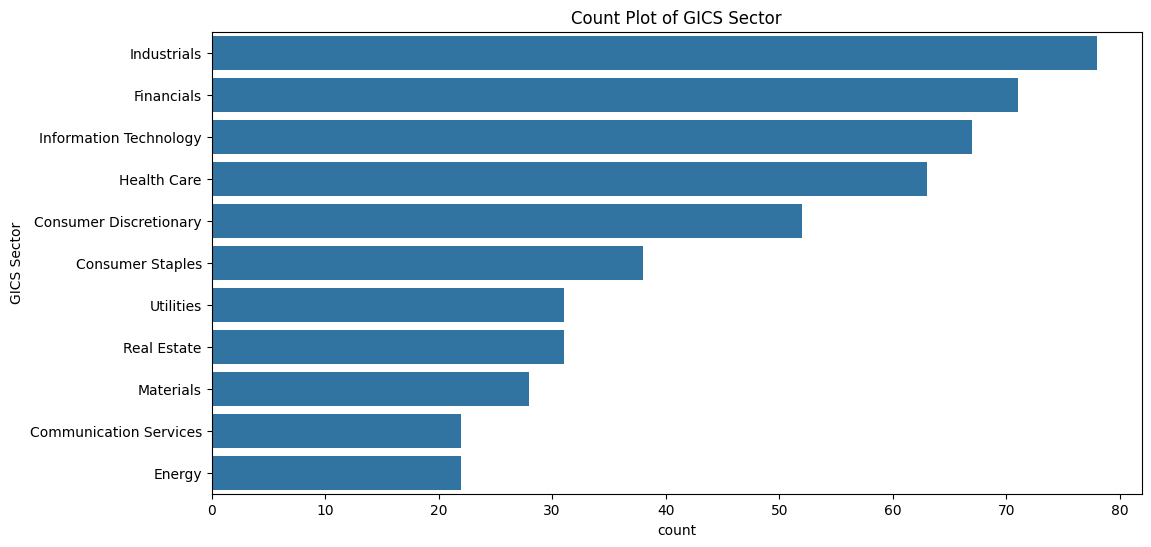

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y=eda_df['GICS Sector'], order=eda_df['GICS Sector'].value_counts().index)
plt.title('Count Plot of GICS Sector')
plt.show()


#Merging

In [1]:
import pandas as pd

# Software Engineering Exam Data
df1SE = pd.DataFrame({
    'StudentID': [101, 103, 105, 107, 109, 111, 113, 115, 117, 119],
    'ScoreSE': [45, 78, 65, 80, 90, 66, 71, 85, 59, 92]
})

df2SE = pd.DataFrame({
    'StudentID': [102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124],
    'ScoreSE': [56, 67, 73, 88, 92, 45, 78, 62, 81, 95, 72, 89]
})

# Machine Learning Exam Data
df1ML = pd.DataFrame({
    'StudentID': [101, 103, 105, 107, 109, 111, 113, 115, 117, 119],
    'ScoreML': [70, 88, 75, 79, 83, 90, 95, 85, 80, 89]
})

df2ML = pd.DataFrame({
    'StudentID': [102, 104, 106, 108, 110, 112, 114, 116],
    'ScoreML': [85, 75, 68, 92, 88, 79, 90, 74]
})


In [2]:
#Combining the data
dfSE = pd.concat([df1SE, df2SE], ignore_index=True)
dfML = pd.concat([df1ML, df2ML], ignore_index=True)

df_combined = pd.concat([dfML, dfSE], axis=1)
print("\nAll Students Appearing in Any Exam:\n", df_combined)



All Students Appearing in Any Exam:
     StudentID  ScoreML  StudentID  ScoreSE
0       101.0     70.0        101       45
1       103.0     88.0        103       78
2       105.0     75.0        105       65
3       107.0     79.0        107       80
4       109.0     83.0        109       90
5       111.0     90.0        111       66
6       113.0     95.0        113       71
7       115.0     85.0        115       85
8       117.0     80.0        117       59
9       119.0     89.0        119       92
10      102.0     85.0        102       56
11      104.0     75.0        104       67
12      106.0     68.0        106       73
13      108.0     92.0        108       88
14      110.0     88.0        110       92
15      112.0     79.0        112       45
16      114.0     90.0        114       78
17      116.0     74.0        116       62
18        NaN      NaN        118       81
19        NaN      NaN        120       95
20        NaN      NaN        122       72
21        NaN   

In [3]:
#Finding Students Appearing in Both Courses
dfSE = pd.concat([df1SE, df2SE], ignore_index=True)
dfML = pd.concat([df1ML, df2ML], ignore_index=True)

df_both_courses = dfSE.merge(dfML, how='inner', on="StudentID")
print("\nStudents Who Appeared in Both Courses:\n", df_both_courses)



Students Who Appeared in Both Courses:
     StudentID  ScoreSE  ScoreML
0         101       45       70
1         103       78       88
2         105       65       75
3         107       80       79
4         109       90       83
5         111       66       90
6         113       71       95
7         115       85       85
8         117       59       80
9         119       92       89
10        102       56       85
11        104       67       75
12        106       73       68
13        108       88       92
14        110       92       88
15        112       45       79
16        114       78       90
17        116       62       74


In [4]:
#Finding All Software Engineering Students & Checking ML Scores
dfSE = pd.concat([df1SE, df2SE], ignore_index=True)
dfML = pd.concat([df1ML, df2ML], ignore_index=True)

df_left = dfSE.merge(dfML, how='left', on="StudentID")
print("\nSoftware Engineering Students & ML Scores (if available):\n", df_left)



Software Engineering Students & ML Scores (if available):
     StudentID  ScoreSE  ScoreML
0         101       45     70.0
1         103       78     88.0
2         105       65     75.0
3         107       80     79.0
4         109       90     83.0
5         111       66     90.0
6         113       71     95.0
7         115       85     85.0
8         117       59     80.0
9         119       92     89.0
10        102       56     85.0
11        104       67     75.0
12        106       73     68.0
13        108       88     92.0
14        110       92     88.0
15        112       45     79.0
16        114       78     90.0
17        116       62     74.0
18        118       81      NaN
19        120       95      NaN
20        122       72      NaN
21        124       89      NaN


In [5]:
# 1. Total Students Appearing in Any Exam
total_students = pd.concat([df1SE, df2SE, df1ML, df2ML])['StudentID'].nunique()
print("\nTotal Students Who Appeared in Exams:", total_students)

# 2. Students Appearing Only for Software Engineering
only_SE = set(dfSE['StudentID']) - set(dfML['StudentID'])
print("\nStudents Who Only Took Software Engineering:", len(only_SE))

# 3. Students Appearing Only for Machine Learning
only_ML = set(dfML['StudentID']) - set(dfSE['StudentID'])
print("\nStudents Who Only Took Machine Learning:", len(only_ML))



Total Students Who Appeared in Exams: 22

Students Who Only Took Software Engineering: 4

Students Who Only Took Machine Learning: 0


#Transformation Techniques

### 1.Data Deduplication

In [6]:
import pandas as pd

# Creating a DataFrame with duplicate values
df = pd.DataFrame({
    'Course': ['Python', 'Python', 'Python', 'Data Science', 'Data Science', 'AI', 'AI', 'AI'],
    'Students': [50, 50, 65, 80, 80, 90, 100, 100]
})

# Displaying the DataFrame
print("Original DataFrame with Duplicates:\n", df)


Original DataFrame with Duplicates:
          Course  Students
0        Python        50
1        Python        50
2        Python        65
3  Data Science        80
4  Data Science        80
5            AI        90
6            AI       100
7            AI       100


In [7]:
# Checking for duplicate rows
duplicates = df.duplicated()
print("\nDuplicated Rows (Boolean Series):\n", duplicates)



Duplicated Rows (Boolean Series):
 0    False
1     True
2    False
3    False
4     True
5    False
6    False
7     True
dtype: bool


In [8]:
# Removing duplicate rows and keeping the first occurrence
df_no_duplicates = df.drop_duplicates()

# Displaying the cleaned DataFrame
print("\nDataFrame After Removing Duplicates:\n", df_no_duplicates)



DataFrame After Removing Duplicates:
          Course  Students
0        Python        50
2        Python        65
3  Data Science        80
5            AI        90
6            AI       100


In [9]:
# Removing duplicates based on 'Students' column
df_filtered = df.drop_duplicates(['Students'])

# Displaying the result
print("\nDataFrame After Removing Duplicates Based on 'Students' Column:\n", df_filtered)



DataFrame After Removing Duplicates Based on 'Students' Column:
          Course  Students
0        Python        50
2        Python        65
3  Data Science        80
5            AI        90
6            AI       100


### 2. Replacing Values

In [10]:
import pandas as pd
import numpy as np

# Creating a sample DataFrame
replace_df = pd.DataFrame({
    'Product': ['Laptop', 'Phone', 'Tablet', 'Laptop', 'Tablet', 'Phone', 'Phone', 'Laptop'],
    'Price': [800, 500, -200, 800, 300, -200, 500, 1000]
})

print("\nOriginal DataFrame:\n", replace_df)


Original DataFrame:
   Product  Price
0  Laptop    800
1   Phone    500
2  Tablet   -200
3  Laptop    800
4  Tablet    300
5   Phone   -200
6   Phone    500
7  Laptop   1000


In [11]:
# Replacing -200 with NaN
replace_df = replace_df.replace(to_replace=-200, value=np.nan)
print("\nDataFrame After Replacing -200 with NaN:\n", replace_df)


DataFrame After Replacing -200 with NaN:
   Product   Price
0  Laptop   800.0
1   Phone   500.0
2  Tablet     NaN
3  Laptop   800.0
4  Tablet   300.0
5   Phone     NaN
6   Phone   500.0
7  Laptop  1000.0


In [13]:
#Replacing multiple values: -200 → NaN, 500 → 550
replace_df = replace_df.replace(to_replace=[np.nan, 500], value=[np.nan, 550])
print("\nDataFrame After Replacing NaN & 500 with 550:\n", replace_df)


DataFrame After Replacing NaN & 500 with 550:
   Product   Price
0  Laptop   800.0
1   Phone   550.0
2  Tablet     NaN
3  Laptop   800.0
4  Tablet   300.0
5   Phone     NaN
6   Phone   550.0
7  Laptop  1000.0


### 3. Handling Missing values

In [14]:
# Creating a DataFrame with missing values
data = np.arange(10, 40).reshape(5, 6)
df_missing = pd.DataFrame(data, index=['Store A', 'Store B', 'Store C', 'Store D', 'Store E'],
                          columns=['Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6'])


In [16]:
#Adding missing values
df_missing['Item7'] = np.nan
df_missing.loc['Store F'] = np.arange(10, 17)
df_missing.loc['Store G'] = np.nan
df_missing['Item7']['Store A'] = 50.0  # Correct way to assign value

print("\nDataFrame with Missing Values:\n", df_missing)


DataFrame with Missing Values:
          Item1  Item2  Item3  Item4  Item5  Item6  Item7
Store A   10.0   11.0   12.0   13.0   14.0   15.0   50.0
Store B   16.0   17.0   18.0   19.0   20.0   21.0    NaN
Store C   22.0   23.0   24.0   25.0   26.0   27.0    NaN
Store D   28.0   29.0   30.0   31.0   32.0   33.0    NaN
Store E   34.0   35.0   36.0   37.0   38.0   39.0    NaN
Store F   10.0   11.0   12.0   13.0   14.0   15.0   16.0
Store G    NaN    NaN    NaN    NaN    NaN    NaN    NaN


<ipython-input-16-529528a5f9df>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_missing['Item7']['Store A'] = 50.0  # Correct way to assign value


In [17]:
# Checking for missing values
print("\nMissing Values:\n", df_missing.isnull())


Missing Values:
          Item1  Item2  Item3  Item4  Item5  Item6  Item7
Store A  False  False  False  False  False  False  False
Store B  False  False  False  False  False  False   True
Store C  False  False  False  False  False  False   True
Store D  False  False  False  False  False  False   True
Store E  False  False  False  False  False  False   True
Store F  False  False  False  False  False  False  False
Store G   True   True   True   True   True   True   True


In [18]:
# Counting missing values per column
print("\nCount of Missing Values Per Column:\n", df_missing.isnull().sum())


Count of Missing Values Per Column:
 Item1    1
Item2    1
Item3    1
Item4    1
Item5    1
Item6    1
Item7    5
dtype: int64


In [19]:
# Counting total missing values
print("\nTotal Missing Values:\n", df_missing.isnull().sum().sum())


Total Missing Values:
 11


In [20]:
print("\nNon-Missing Value Count Per Column:\n", df_missing.count())


Non-Missing Value Count Per Column:
 Item1    6
Item2    6
Item3    6
Item4    6
Item5    6
Item6    6
Item7    2
dtype: int64


### 4.Dropping missing values

In [21]:
import pandas as pd
import numpy as np

# Creating a DataFrame with missing values
df_missing = pd.DataFrame({
    'Product': ['Laptop', 'Phone', 'Tablet', 'Laptop', 'Tablet', 'Phone', 'Phone', 'Laptop'],
    'Price': [800, np.nan, 300, 800, 300, np.nan, 500, 1000],
    'Stock': [50, 30, np.nan, 20, np.nan, 15, 40, np.nan]
})

print("\nOriginal DataFrame with Missing Values:\n", df_missing)



Original DataFrame with Missing Values:
   Product   Price  Stock
0  Laptop   800.0   50.0
1   Phone     NaN   30.0
2  Tablet   300.0    NaN
3  Laptop   800.0   20.0
4  Tablet   300.0    NaN
5   Phone     NaN   15.0
6   Phone   500.0   40.0
7  Laptop  1000.0    NaN


In [22]:
df_cleaned = df_missing.dropna()
print("\nDataFrame After Dropping Rows with Any NaN:\n", df_cleaned)



DataFrame After Dropping Rows with Any NaN:
   Product  Price  Stock
0  Laptop  800.0   50.0
3  Laptop  800.0   20.0
6   Phone  500.0   40.0


In [23]:
#Drop Rows Where All Values Are NaN
df_filtered = df_missing.dropna(how='all')
print("\nDataFrame After Dropping Rows Where All Values Are NaN:\n", df_filtered)



DataFrame After Dropping Rows Where All Values Are NaN:
   Product   Price  Stock
0  Laptop   800.0   50.0
1   Phone     NaN   30.0
2  Tablet   300.0    NaN
3  Laptop   800.0   20.0
4  Tablet   300.0    NaN
5   Phone     NaN   15.0
6   Phone   500.0   40.0
7  Laptop  1000.0    NaN


In [24]:
#Drop Columns Where All Values Are NaN
df_dropped_columns = df_missing.dropna(how='all', axis=1)
print("\nDataFrame After Dropping Columns with All NaN:\n", df_dropped_columns)



DataFrame After Dropping Columns with All NaN:
   Product   Price  Stock
0  Laptop   800.0   50.0
1   Phone     NaN   30.0
2  Tablet   300.0    NaN
3  Laptop   800.0   20.0
4  Tablet   300.0    NaN
5   Phone     NaN   15.0
6   Phone   500.0   40.0
7  Laptop  1000.0    NaN


In [25]:
#Drop Columns with More Than 3 NaN (Threshold-Based)
df_thresh = df_missing.dropna(thresh=5, axis=1)
print("\nDataFrame After Dropping Columns with More Than 3 NaN:\n", df_thresh)



DataFrame After Dropping Columns with More Than 3 NaN:
   Product   Price  Stock
0  Laptop   800.0   50.0
1   Phone     NaN   30.0
2  Tablet   300.0    NaN
3  Laptop   800.0   20.0
4  Tablet   300.0    NaN
5   Phone     NaN   15.0
6   Phone   500.0   40.0
7  Laptop  1000.0    NaN


### 5.Filling Missing Values

In [27]:
import pandas as pd
import numpy as np

# Creating a DataFrame with missing values
df_fill = pd.DataFrame({
    'Product': ['Laptop', 'Phone', 'Tablet', 'Laptop', 'Tablet', 'Phone', 'Phone', 'Laptop'],
    'Price': [800, np.nan, 300, 800, 300, np.nan, 500, 1000],
    'Stock': [50, 30, np.nan, 20, np.nan, 15, 40, np.nan]
})

print("\nOriginal DataFrame with Missing Values:\n", df_fill)



Original DataFrame with Missing Values:
   Product   Price  Stock
0  Laptop   800.0   50.0
1   Phone     NaN   30.0
2  Tablet   300.0    NaN
3  Laptop   800.0   20.0
4  Tablet   300.0    NaN
5   Phone     NaN   15.0
6   Phone   500.0   40.0
7  Laptop  1000.0    NaN


In [28]:
# Filling NaN values with 0
df_filled = df_fill.fillna(0)
print("\nDataFrame After Replacing NaN with 0:\n", df_filled)



DataFrame After Replacing NaN with 0:
   Product   Price  Stock
0  Laptop   800.0   50.0
1   Phone     0.0   30.0
2  Tablet   300.0    0.0
3  Laptop   800.0   20.0
4  Tablet   300.0    0.0
5   Phone     0.0   15.0
6   Phone   500.0   40.0
7  Laptop  1000.0    0.0


In [29]:
# Mean before filling NaN
print("\nMean Before Filling NaN:\n", df_fill.mean(numeric_only=True))

# Mean after filling NaN
print("\nMean After Filling NaN:\n", df_filled.mean(numeric_only=True))



Mean Before Filling NaN:
 Price    616.666667
Stock     31.000000
dtype: float64

Mean After Filling NaN:
 Price    462.500
Stock     19.375
dtype: float64


In [30]:
# Forward fill missing values
df_forward_filled = df_fill.ffill()
print("\nDataFrame After Forward Fill (ffill):\n", df_forward_filled)



DataFrame After Forward Fill (ffill):
   Product   Price  Stock
0  Laptop   800.0   50.0
1   Phone   800.0   30.0
2  Tablet   300.0   30.0
3  Laptop   800.0   20.0
4  Tablet   300.0   20.0
5   Phone   300.0   15.0
6   Phone   500.0   40.0
7  Laptop  1000.0   40.0


In [31]:
# Backward fill missing values
df_backward_filled = df_fill.bfill()
print("\nDataFrame After Backward Fill (bfill):\n", df_backward_filled)



DataFrame After Backward Fill (bfill):
   Product   Price  Stock
0  Laptop   800.0   50.0
1   Phone   300.0   30.0
2  Tablet   300.0   20.0
3  Laptop   800.0   20.0
4  Tablet   300.0   15.0
5   Phone   500.0   15.0
6   Phone   500.0   40.0
7  Laptop  1000.0    NaN


#Discretization and binning

In [ ]:
import pandas as pd

# Define bins for 'Founded' column
bins = [1800, 1900, 1950, 2000, 2025]
bin_labels = ['Very Old (1800-1900)', 'Old (1900-1950)', 'Mid-Age (1950-2000)', 'New (2000-2025)']

# Applying binning
eda_df['Founded_Bins'] = pd.cut(eda_df['Founded'], bins=bins, labels=bin_labels)

# Display binning results
print(eda_df[['Founded', 'Founded_Bins']].head())

# Count the number of companies in each bin
print("\nDistribution of Companies by Founded Year Bins:\n", eda_df['Founded_Bins'].value_counts())


   Founded          Founded_Bins
0   1902.0       Old (1900-1950)
1   1916.0       Old (1900-1950)
2   1888.0  Very Old (1800-1900)
3   2013.0       New (2000-2025)
4   1989.0   Mid-Age (1950-2000)

Distribution of Companies by Founded Year Bins:
 Founded_Bins
Mid-Age (1950-2000)     253
Old (1900-1950)         106
Very Old (1800-1900)     75
New (2000-2025)          67
Name: count, dtype: int64


In [ ]:
# Define bins for 'CIK'
cik_bins = [10000, 50000, 100000, 2000000]
cik_labels = ['Low CIK', 'Medium CIK', 'High CIK']

# Applying binning
eda_df['CIK_Bins'] = pd.cut(eda_df['CIK'], bins=cik_bins, labels=cik_labels)

# Display binning results
print(eda_df[['CIK', 'CIK_Bins']].head())

# Count the number of companies in each bin
print("\nDistribution of Companies by CIK Bins:\n", eda_df['CIK_Bins'].value_counts())


       CIK    CIK_Bins
0    66740  Medium CIK
1    91142  Medium CIK
2     1800         NaN
3  1551152    High CIK
4  1467373    High CIK

Distribution of Companies by CIK Bins:
 CIK_Bins
High CIK      377
Medium CIK     58
Low CIK        50
Name: count, dtype: int64


In [ ]:
# Creating 4 equal-length bins for 'Founded'
eda_df['Founded_Equal_Bins'] = pd.cut(eda_df['Founded'], bins=4)

# Checking the binning results
print("\nEqual-Length Binning for 'Founded':\n", eda_df['Founded_Equal_Bins'].value_counts())



Equal-Length Binning for 'Founded':
 Founded_Equal_Bins
(1964.0, 2024.0]     284
(1904.0, 1964.0]     133
(1844.0, 1904.0]      73
(1783.76, 1844.0]     13
Name: count, dtype: int64


In [ ]:
# Quantile-based binning for 'Founded'
eda_df['Founded_Quantile_Bins'] = pd.qcut(eda_df['Founded'], q=4)

# Checking the binning results
print("\nQuantile-Based Binning for 'Founded':\n", eda_df['Founded_Quantile_Bins'].value_counts())



Quantile-Based Binning for 'Founded':
 Founded_Quantile_Bins
(1920.0, 1971.0]      133
(1783.999, 1920.0]    127
(1971.0, 1994.0]      123
(1994.0, 2024.0]      120
Name: count, dtype: int64


#Outlier detection and filtering

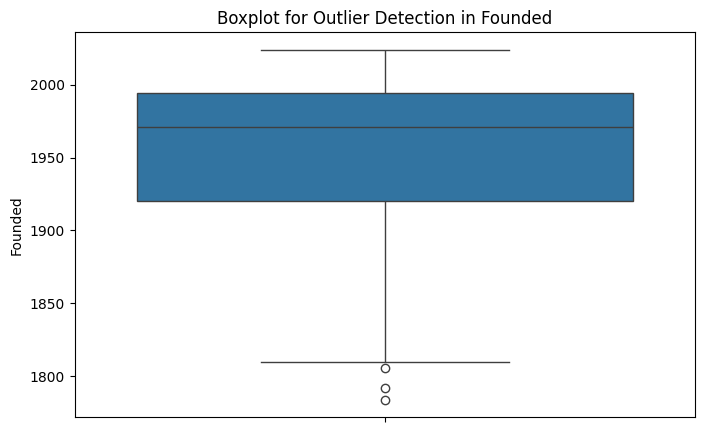

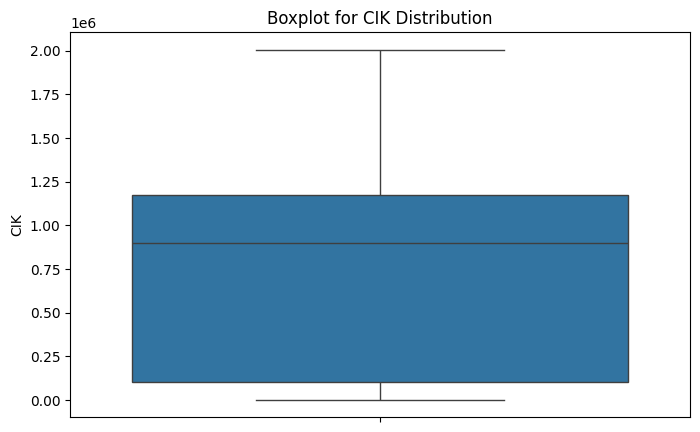

In [ ]:
# Boxplot for 'Founded'
plt.figure(figsize=(8, 5))
sns.boxplot(y=eda_df['Founded'])
plt.title('Boxplot for Outlier Detection in Founded')
plt.show()

# Boxplot for 'CIK' (to check distribution, even though it's an ID)
plt.figure(figsize=(8, 5))
sns.boxplot(y=eda_df['CIK'])
plt.title('Boxplot for CIK Distribution')
plt.show()


In [ ]:
# Outlier Detection using IQR for 'Founded'
Q1 = eda_df['Founded'].quantile(0.25)
Q3 = eda_df['Founded'].quantile(0.75)
IQR = Q3 - Q1

# Defining outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detecting outliers
outliers_founded = eda_df[(eda_df['Founded'] < lower_bound) | (eda_df['Founded'] > upper_bound)]
print("Number of Outliers in 'Founded':", len(outliers_founded))

# Displaying outlier rows
print(outliers_founded)


Number of Outliers in 'Founded': 3
    Symbol                  Security       GICS Sector  \
58      BK                BNY Mellon        Financials   
119     CL         Colgate-Palmolive  Consumer Staples   
426    STT  State Street Corporation        Financials   

                    GICS Sub-Industry    Headquarters Location Date added  \
58   Asset Management & Custody Banks  New York City, New York 1995-03-31   
119                Household Products  New York City, New York 1957-03-04   
426  Asset Management & Custody Banks    Boston, Massachusetts 2003-03-14   

         CIK  Founded          Founded_Bins    CIK_Bins Founded_Equal_Bins  \
58   1390777   1784.0                   NaN    High CIK  (1783.76, 1844.0]   
119    21665   1806.0  Very Old (1800-1900)     Low CIK  (1783.76, 1844.0]   
426    93751   1792.0                   NaN  Medium CIK  (1783.76, 1844.0]   

    Founded_Quantile_Bins    TotalPrice  
58     (1783.999, 1920.0]  2.481146e+09  
119    (1783.999, 1920.0] 

# Time Series Analysis

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generating a random time series with zero mean and standard deviation of 1
time_series_data = np.random.normal(loc=0.0, scale=1.0, size=100)
print("\nGenerated Time Series Data:\n", time_series_data)



Generated Time Series Data:
 [-1.44795404 -0.92184859  0.73478491  0.62147882 -0.57930403 -2.27871619
 -0.56231668  0.54180252  1.59441835 -0.0764537  -1.01290134 -0.81432772
  0.82575012 -0.36800048  0.10554318  0.11099331  1.83317626  0.93885258
 -1.03440211 -1.69535676  0.17259866  0.25768873 -0.05477781  0.56471079
 -0.85260017 -1.47006273  0.22845975 -1.41548031  0.34220346  0.84014241
  0.14138238  2.72926313  0.64932008  0.83787017  0.40636123 -0.22755859
 -0.53376929  0.44382022 -0.47062347 -1.01635684  2.1260953  -0.28888844
 -0.94626539  1.25079484 -0.68103099  0.50849429  1.07582759 -0.1805429
  0.2427395   0.19388906  0.25080302 -0.6681332  -0.51209533 -0.3712198
  0.98576303 -0.31697893  1.21436224  0.91759623  0.37662794  0.19568446
 -1.93761297 -1.21479245  1.23765151 -0.44024602 -0.06554513  0.20810017
  1.33342794 -1.57664952 -1.31715908 -0.26000676  0.15842596  0.47299292
 -0.03208016 -0.33798676 -0.85976759  1.23006911 -0.06792311 -1.1269684
  0.27412057  0.80847903

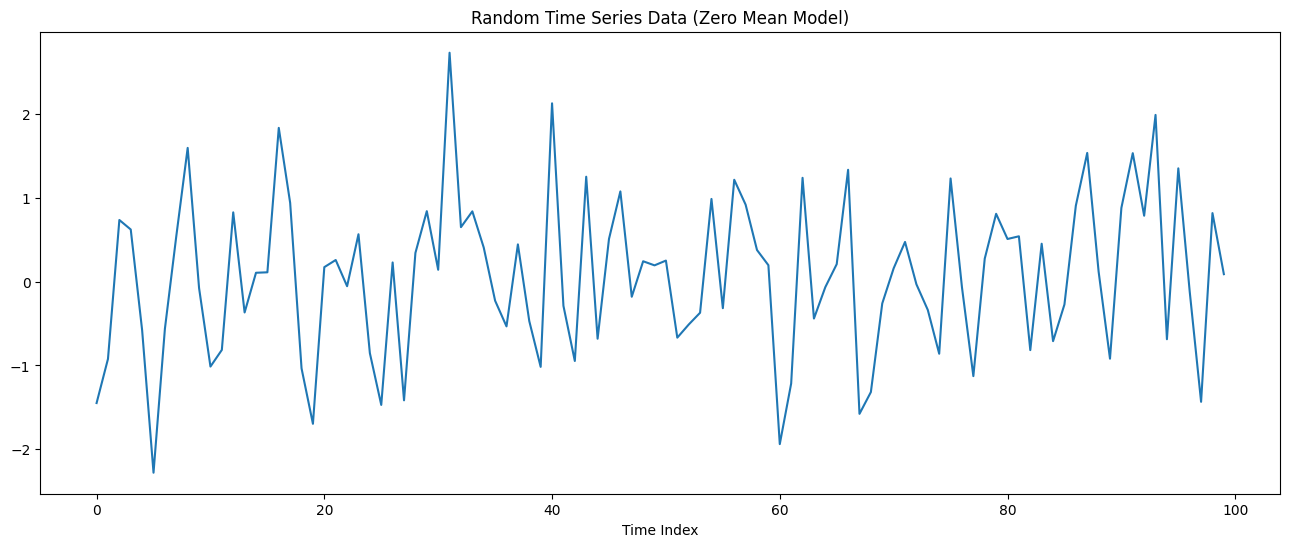

In [33]:
# Plotting the generated time series data
plt.figure(figsize=(16, 6))
g = sns.lineplot(data=time_series_data)
g.set_title('Random Time Series Data (Zero Mean Model)')
g.set_xlabel('Time Index')
plt.show()


In [34]:
# Performing a cumulative sum to simulate a random walk
random_walk = np.cumsum(time_series_data)
print("\nRandom Walk Data:\n", random_walk)



Random Walk Data:
 [-1.44795404 -2.36980263 -1.63501772 -1.0135389  -1.59284293 -3.87155912
 -4.4338758  -3.89207328 -2.29765493 -2.37410863 -3.38700997 -4.20133769
 -3.37558757 -3.74358805 -3.63804487 -3.52705156 -1.6938753  -0.75502272
 -1.78942483 -3.48478159 -3.31218293 -3.0544942  -3.10927201 -2.54456122
 -3.3971614  -4.86722413 -4.63876438 -6.05424468 -5.71204122 -4.87189881
 -4.73051643 -2.0012533  -1.35193322 -0.51406305 -0.10770183 -0.33526041
 -0.8690297  -0.42520948 -0.89583295 -1.91218979  0.21390551 -0.07498293
 -1.02124832  0.22954652 -0.45148447  0.05700981  1.13283741  0.9522945
  1.195034    1.38892306  1.63972608  0.97159288  0.45949755  0.08827775
  1.07404078  0.75706185  1.97142409  2.88902032  3.26564826  3.46133271
  1.52371974  0.30892729  1.5465788   1.10633277  1.04078764  1.24888781
  2.58231575  1.00566624 -0.31149285 -0.5714996  -0.41307364  0.05991927
  0.02783911 -0.31014765 -1.16991524  0.06015387 -0.00776924 -1.13473764
 -0.86061708 -0.05213805  0.4560

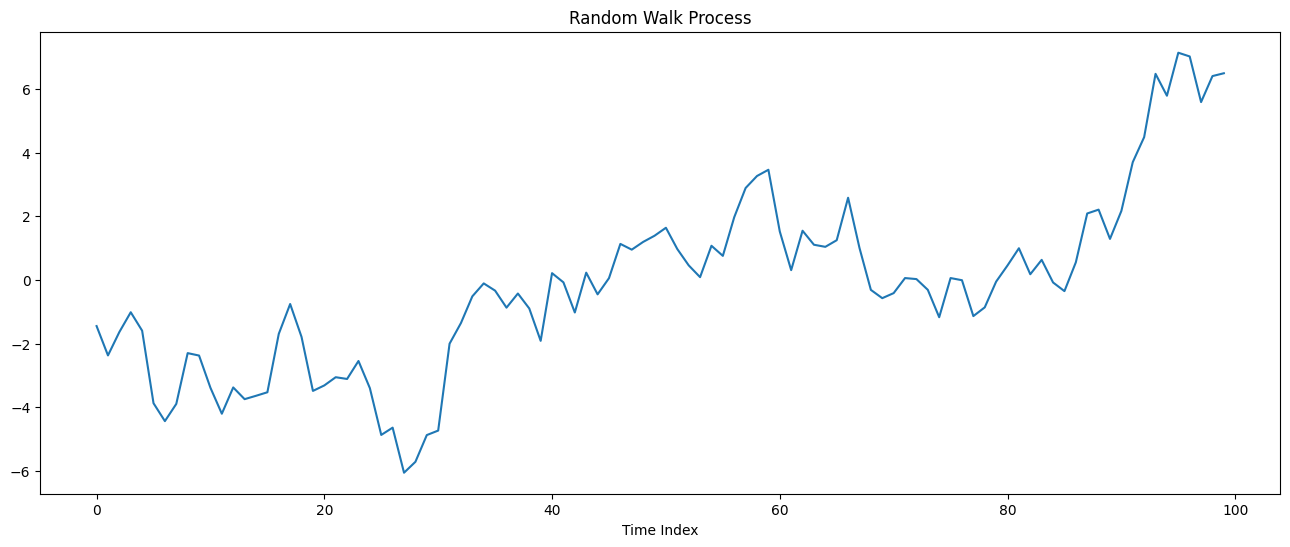

In [35]:
# Plotting the random walk
plt.figure(figsize=(16, 6))
g = sns.lineplot(data=random_walk)
g.set_title('Random Walk Process')
g.set_xlabel('Time Index')
plt.show()


In [38]:
import pandas as pd

# Load Dataset from the raw GitHub link
file_url = "https://raw.githubusercontent.com/Teja220/EDA/main/EDA.xlsx"  # Update this with your actual raw link
eda_df = pd.read_excel(file_url, sheet_name='EDA')

# Convert 'Date added' column to datetime format and set it as index
eda_df['Date added'] = pd.to_datetime(eda_df['Date added'])
eda_df.set_index('Date added', inplace=True)

# Display first few rows
eda_df.head()


,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,CIK,Founded
Date added,,,,,,,
1957-03-04,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",66740,1902
2017-07-26,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",91142,1916
1957-03-04,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1800,1888
2012-12-31,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",1551152,2013 (1888)
2011-07-06,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",1467373,1989


In [39]:
# Extract Year, Month, and Weekday Name from the index
eda_df['Year'] = eda_df.index.year
eda_df['Month'] = eda_df.index.month
eda_df['Weekday Name'] = eda_df.index.day_name()

# Extract only numeric values from 'Founded' column
eda_df['Founded'] = eda_df['Founded'].astype(str).str.extract(r'(\d{4})').astype(float)

print("\nUpdated DataFrame with Time-Based Indexing:\n", eda_df.head())


Updated DataFrame with Time-Based Indexing:
            Symbol             Security             GICS Sector  \
Date added                                                       
1957-03-04    MMM                   3M             Industrials   
2017-07-26    AOS          A. O. Smith             Industrials   
1957-03-04    ABT  Abbott Laboratories             Health Care   
2012-12-31   ABBV               AbbVie             Health Care   
2011-07-06    ACN            Accenture  Information Technology   

                         GICS Sub-Industry    Headquarters Location      CIK  \
Date added                                                                     
1957-03-04        Industrial Conglomerates    Saint Paul, Minnesota    66740   
2017-07-26               Building Products     Milwaukee, Wisconsin    91142   
1957-03-04           Health Care Equipment  North Chicago, Illinois     1800   
2012-12-31                   Biotechnology  North Chicago, Illinois  1551152   
2011-07-06 

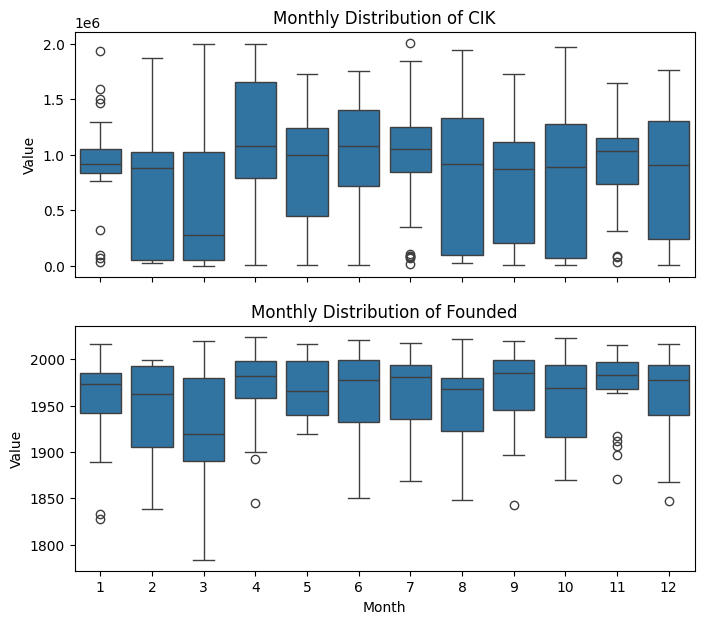

In [40]:
# Boxplots for Monthly Distribution of CIK and Founded
fig, axes = plt.subplots(2, 1, figsize=(8, 7), sharex=True)

for name, ax in zip(['CIK', 'Founded'], axes):
    sns.boxplot(data=eda_df, x='Month', y=name, ax=ax)
    ax.set_ylabel('Value')
    ax.set_title(f'Monthly Distribution of {name}')
    if ax != axes[-1]:
        ax.set_xlabel('')
plt.show()


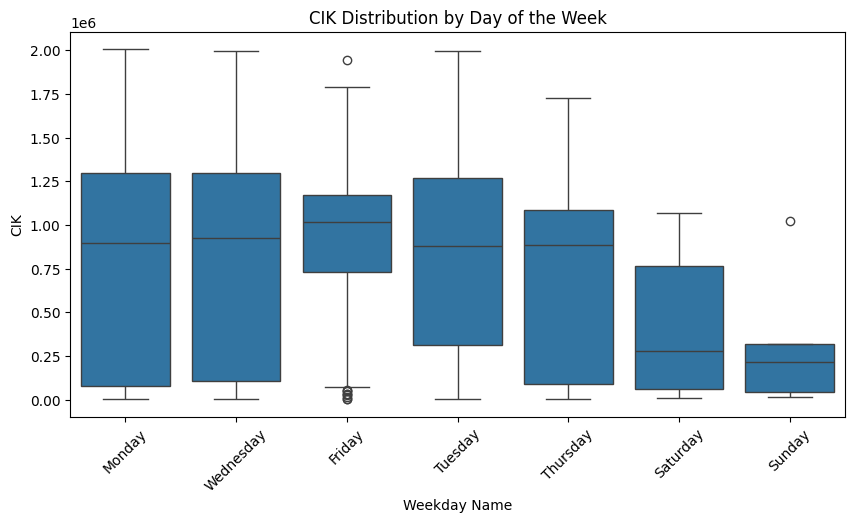

In [41]:
# Boxplot for Weekly Distribution of CIK
plt.figure(figsize=(10, 5))
sns.boxplot(data=eda_df, x='Weekday Name', y='CIK')
plt.title('CIK Distribution by Day of the Week')
plt.xticks(rotation=45)
plt.show()


In [42]:
# Resampling Data: Weekly Mean of CIK and Founded
resampled_weekly = eda_df[['CIK', 'Founded']].resample('W').mean()

print("\nWeekly Resampled Data:\n", resampled_weekly.head())



Weekly Resampled Data:
                  CIK      Founded
Date added                       
1957-03-10  315496.5  1908.722222
1957-03-17       NaN          NaN
1957-03-24       NaN          NaN
1957-03-31       NaN          NaN
1957-04-07       NaN          NaN


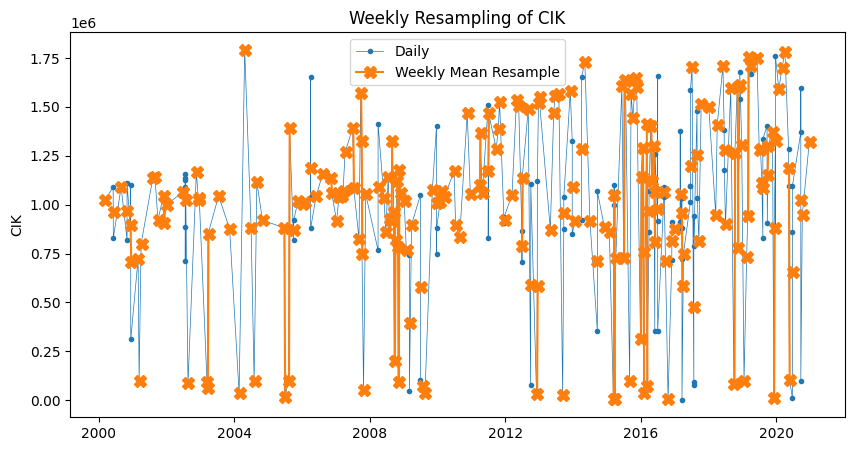

In [44]:
# Ensure 'Date added' is sorted before slicing
eda_df = eda_df.sort_index()

# Now, define the date range for visualization
start, end = '2000-01', '2020-12'

# Resampling Data: Weekly Mean of CIK
resampled_weekly = eda_df[['CIK']].resample('W').mean()

# Plotting Weekly Resampled Data for CIK
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(eda_df.loc[start:end, 'CIK'], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(resampled_weekly.loc[start:end, 'CIK'], marker='X', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('CIK')
ax.set_title('Weekly Resampling of CIK')
ax.legend()
plt.show()


KeyError: 'Founded'

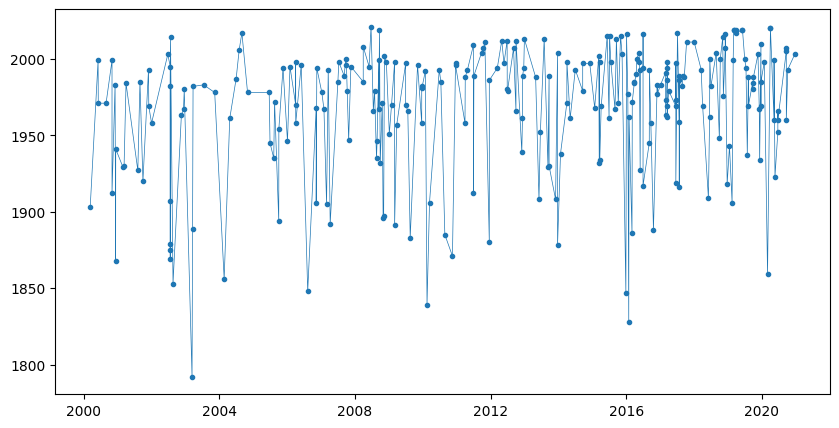

In [45]:
# Plotting Weekly Resampled Data for Founded Year
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(eda_df.loc[start:end, 'Founded'], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(resampled_weekly.loc[start:end, 'Founded'], marker='X', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Founded Year')
ax.set_title('Weekly Resampling of Founded Year')
ax.legend()
plt.show()
